In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

import matplotlib.pyplot as plt
import numpy as np

X,y = mnist['data'], mnist['target']
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


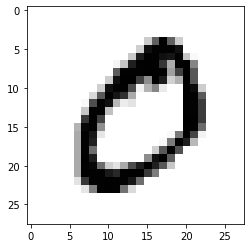

In [2]:
some_digit = X[1]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap='binary')
plt.show()

In [3]:
y = y.astype(np.int8)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [4]:
from sklearn.svm import LinearSVC
svm_clf = LinearSVC(random_state=42)
svm_clf.fit(X_train, y_train)

/home/tpvt96/anaconda3/envs/rlcourse/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(random_state=42)

5
[5]


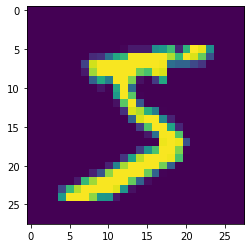

In [5]:
plt.imshow(X_train[0].reshape(28,28))
print(y_train[0])
print(svm_clf.predict(X_train[0][np.newaxis,...]))

In [8]:
print(svm_clf.predict(X_train[0:3].reshape(-1, 784)))
print(svm_clf.decision_function(X_train[0:3].reshape(-1, 784)))
print(np.argmax(svm_clf.decision_function(X_train[0:3].reshape(-1, 784)), axis=1))

[5 0 4]
[[-2.70580618 -5.21572401 -2.72539959  0.22594687 -6.19996616  0.54513822
  -4.83399445 -2.65844158 -2.20613726 -3.78274111]
 [ 2.49633246 -7.33832172 -2.65995618 -2.26941011 -4.41163214 -1.54647976
  -2.66936362 -4.57192102 -0.69260362 -3.33673353]
 [-4.47625397 -4.30158851 -1.20701783 -0.57778184  0.26872737 -3.27863505
  -6.02182081 -1.37692195 -4.33849976 -4.18007212]]
[5 0 4]


In [9]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int8)

In [10]:
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
ovr_clf = OneVsRestClassifier(LinearSVC(random_state=42))
ovo_clf = OneVsOneClassifier(LinearSVC(random_state=42))

In [11]:
ovr_clf.fit(X_train, y_train)

/home/tpvt96/anaconda3/envs/rlcourse/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/tpvt96/anaconda3/envs/rlcourse/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/tpvt96/anaconda3/envs/rlcourse/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/tpvt96/anaconda3/envs/rlcourse/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/tpvt96/anaconda3/envs/rlcourse/lib/python3.7/site-packages/sklearn/svm/_base.py:977: C

OneVsRestClassifier(estimator=LinearSVC(random_state=42))

In [20]:
print(ovr_clf.predict(X_train[0:2].reshape(-1, 784)))
print(ovr_clf.decision_function(X_train[0:2].reshape(-1, 784)))
print(np.mean(y_train == ovr_clf.predict(X_train)))
print(ovr_clf.estimators_)


[5 0]
[[-1.14217726 -6.6201921  -2.57141277 -1.00205007 -5.72484838  0.94447964
  -4.24790085 -4.16216696 -3.74558596 -3.19999229]
 [ 2.60987388 -7.73024297 -2.29187035 -3.05764342 -4.93163834 -1.01734918
  -2.12400478 -5.48058523 -2.28338901 -2.53480198]]
0.8388833333333333
[LinearSVC(random_state=42), LinearSVC(random_state=42), LinearSVC(random_state=42), LinearSVC(random_state=42), LinearSVC(random_state=42), LinearSVC(random_state=42), LinearSVC(random_state=42), LinearSVC(random_state=42), LinearSVC(random_state=42), LinearSVC(random_state=42)]


In [18]:
for i in range(10):
    print(ovr_clf.estimators_[i].predict(X_train[0:2].reshape(-1, 784)))


[0 1]
[0 0]
[0 0]
[0 0]
[0 0]
[1 0]
[0 0]
[0 0]
[0 0]
[0 0]


In [21]:
ovo_clf.fit(X_train, y_train)

/home/tpvt96/anaconda3/envs/rlcourse/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/tpvt96/anaconda3/envs/rlcourse/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/tpvt96/anaconda3/envs/rlcourse/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/tpvt96/anaconda3/envs/rlcourse/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/tpvt96/anaconda3/envs/rlcourse/lib/python3.7/site-packages/sklearn/svm/_base.py:977: C

/home/tpvt96/anaconda3/envs/rlcourse/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/tpvt96/anaconda3/envs/rlcourse/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/tpvt96/anaconda3/envs/rlcourse/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/tpvt96/anaconda3/envs/rlcourse/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


OneVsOneClassifier(estimator=LinearSVC(random_state=42))

In [23]:
print(ovo_clf.predict(X_train[0:2].reshape(-1, 784)))
print(ovo_clf.decision_function(X_train[0:2].reshape(-1, 784)))
print(np.mean(y_train == ovo_clf.predict(X_train)))
print(len(ovo_clf.estimators_))


[5 0]
[[ 2.68423981  2.67984196  6.31286262  8.32846281  0.67316995  9.32926426
   1.67242256  2.68173893  4.29955765  5.77933973]
 [ 9.32904649  0.67105211  8.31863603  4.26201573 -0.32718871  6.31279825
   2.68487518  2.69504512  4.32292693  7.29602428]]
0.95235
45


In [25]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict
scaler = StandardScaler()
sgd_clf = SGDClassifier()
X_train_scaler = scaler.fit_transform(X_train)
y_train_pred = cross_val_predict(sgd_clf, X_train_scaler, y_train, cv=3)

/home/tpvt96/anaconda3/envs/rlcourse/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [29]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
conf_mx = confusion_matrix(y_train, y_train_pred)
print(conf_mx)

[[5571    0   21    7    8   41   34    6  234    1]
 [   0 6405   36   23    4   42    4    7  211   10]
 [  27   26 5220   92   71   26   68   37  380   11]
 [  22   18  111 5232    2  206   27   39  402   72]
 [  10   14   42   11 5197   12   33   26  331  166]
 [  26   15   29  169   51 4455   76   14  525   61]
 [  28   16   39    2   42   95 5559    5  131    1]
 [  20    9   51   26   50   13    3 5706  187  200]
 [  16   64   46   89    3  125   26   11 5429   42]
 [  22   18   30   63  117   34    1  181  369 5114]]


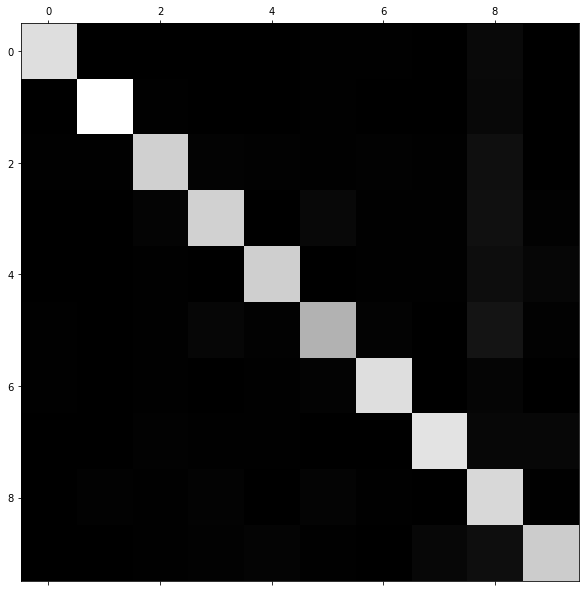

In [38]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
from pylab import rcParams
rcParams['figure.figsize'] = 7, 7


In [43]:
row_sums = conf_mx.sum(axis=1, keepdims = True)
col_sums = conf_mx.sum(axis=0, keepdims = True)

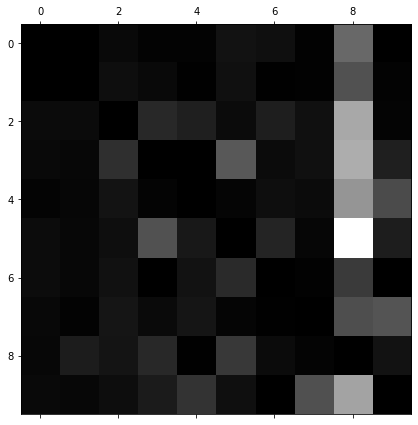

In [50]:
# Normalize by rows
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

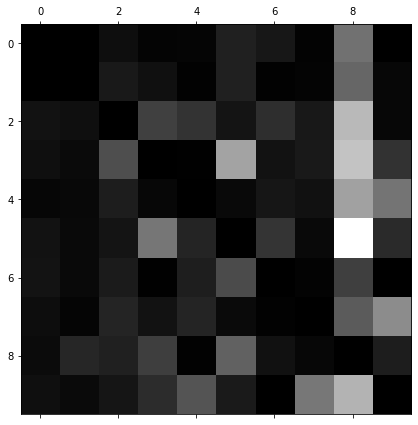

In [53]:
# Normalize by columns
norm_conf_mx_by_col = conf_mx / col_sums
np.fill_diagonal(norm_conf_mx_by_col, 0)
plt.matshow(norm_conf_mx_by_col, cmap=plt.cm.gray)
plt.show()

In [57]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

In [55]:
cl_a = 8
cl_b = 5
X_real_8_pred_8 = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_real_8_pred_5 = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_real_5_pred_8 = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_real_5_pred_5 = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]
plt.figure(figsize=(8,8))

plt.subplot(221); plot_digits(X_real_8_pred_8[:4], images_per_row=16)